In [31]:
import os
import glob
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn import preprocessing

In [32]:
# helpers

def printLoadingScores(pca, index, component):
    # prints loading scores for a given principal component 
    loadingScores = pd.Series(pca.components_[component], index=index).sort_values(ascending=False, key=abs)
    print(loadingScores[loadingScores[0:19].index.values])
    

In [33]:
# Read and merge all cleaned data into a single data frame

df = pd.read_csv('./Data/Cleaned/AllData.csv')

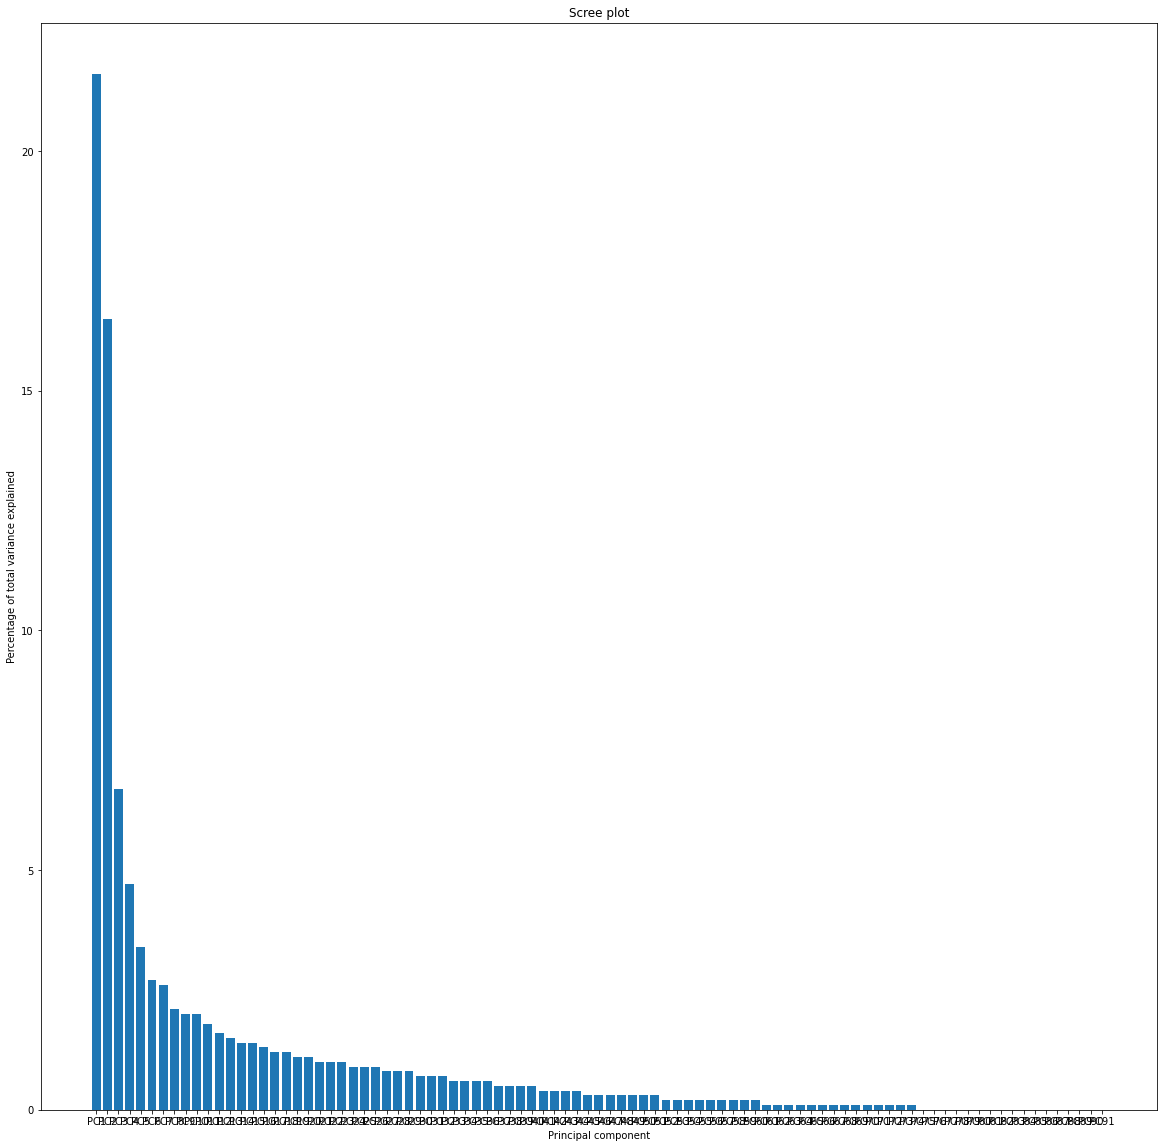

In [34]:
# drop non-numeric and unwanted coloumns
tempDf = df.drop(["Unnamed: 0", "Player", "Team"], axis=1)

# shift data mean to origin and scale variance in each feature to 1
scaledDf = preprocessing.scale(tempDf)

# perform pca
pca = PCA()
pca.fit(scaledDf)
pcaData = pca.transform(scaledDf)

# find percentage of variance accounted for by principal componenets
varPercent = np.round(pca.explained_variance_ratio_ * 100, decimals=1)

# create scree plot
labels = ['PC' + str(i) for i in range(1, len(varPercent) + 1)]

plt.figure(figsize = (20,20))
plt.bar(x=labels, height=varPercent)
plt.ylabel('Percentage of total variance explained')
plt.xlabel('Principal component')
plt.title("Scree plot")
plt.show()


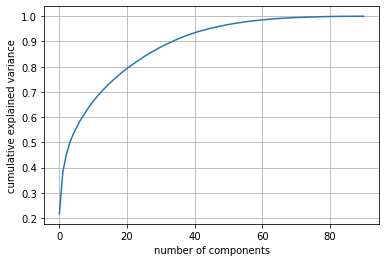

In [35]:
# get cumulative explained variance plot by number of principal components

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.grid()
plt.show()

In [36]:
print(sum(varPercent[:8]))

60.30000000000001


In [37]:
# We use 5 principal components to balance variance explaining power and interpretability of our components
# re-run pca keeping only top 5 components
pca = PCA(5)
pca.fit(scaledDf)
pcaData = pca.transform(scaledDf)

In [38]:
# re-insert players and teams to make a new data frame

pcaDf = pd.DataFrame(pcaData, columns=labels[0:5])
pcaDf = pcaDf[labels[0:5]]
pcaDf["Player"] = df["Player"]
pcaDf["Team"] = df["Team"]

pcaDf.head()

,PC1,PC2,PC3,PC4,PC5,Player,Team
0,-7.937506,6.538865,-3.463275,-2.545460,-2.152836,Stephen Curry,GSW
1,-4.254931,7.347971,-2.386292,-4.267921,-2.230382,Bradley Beal,WAS
2,-9.050960,7.846904,-0.803615,-4.675235,0.191907,Damian Lillard,POR
3,6.485586,15.372255,-4.301402,1.813892,7.064400,Joel Embiid,PHI
4,0.268335,11.387311,1.997607,-1.461920,0.566734,Giannis Antetokounmpo,MIL


In [39]:
# PC1

printLoadingScores(pca, tempDf.columns, 0)
pcaDf.nlargest(10, "PC1")

OREB%               0.188052
AvgDribPerTouch    -0.184832
PaintTouches        0.174451
PaintTouch FGM      0.171677
ContestedDREB%      0.170654
ASTToPass%         -0.169667
DrivePASS          -0.169533
%BLK                0.169094
DriveAST           -0.168196
PaintTouch FTM      0.162755
AVG DREBDistance   -0.159938
AVG OREBDistance   -0.157142
3FGM%UAST          -0.154183
%DREB               0.151614
DREB%               0.149632
AST%               -0.148928
Pull UpFGM         -0.148697
ContestedOREB%      0.148052
SecondaryAST       -0.146166
dtype: float64


,PC1,PC2,PC3,PC4,PC5,Player,Team
94,11.205446,6.594646,2.070441,0.732936,-2.851871,Rudy Gobert,UTA
82,11.143029,5.505923,3.158834,0.717988,-2.108717,Clint Capela,ATL
232,9.922686,2.147343,1.244189,-3.788807,1.378683,Hassan Whiteside,SAC
219,9.825733,2.422078,1.410772,-5.432866,-1.368253,Moses Brown,BOS
274,9.818563,0.717860,2.212906,-2.940581,-1.943885,Daniel Gafford,WAS
122,9.292007,4.933967,0.634086,0.489422,-0.064595,Jarrett Allen,CLE
86,9.286821,7.472394,4.321400,0.847492,0.853605,Andre Drummond,LAL
369,9.137940,-1.076732,3.095404,-5.086068,-0.332779,Onyeka Okongwu,ATL
91,9.068008,6.314492,-0.186258,2.134439,1.504472,Deandre Ayton,PHX
258,9.036206,1.693026,4.168636,-2.381979,-0.778149,DeAndre Jordan,BKN


PC1 seems to reward players who:
- Grab a lot of rebounds,
- Stay in the paint area a lot

PC1 seems to penalize players who:
- Dribble a lot whenever they touch the ball
- Drive to the basket
- Get their rebound further from the basket
- Gets Assist

High PC1 values indicate that the player predominately plays close to the basket. It’s safe to assume Centers would have high PC1 values.

In [40]:
# PC2

printLoadingScores(pca, tempDf.columns, 1)
pcaDf.nlargest(10, "PC2")

PIE                     0.221928
FTM                     0.218054
Front CTTouches         0.210298
USG%                    0.190962
PassesMade              0.188156
OPPPTSPAINT             0.182151
OPPPTSOFFTOV            0.175522
PostTouchFGM            0.161639
DriveFTM                0.158806
PostTouchTO             0.156922
AvgSpeedDef            -0.156180
PostTouchFTM            0.154808
POSS                    0.153683
DriveFGM                0.152866
PostTouchAST            0.151945
DeferredDREB Chances    0.149871
SecondaryAST            0.147903
DFGA                    0.144813
Pull UpFGM              0.144527
dtype: float64


,PC1,PC2,PC3,PC4,PC5,Player,Team
3,6.485586,15.372255,-4.301402,1.813892,7.064400,Joel Embiid,PHI
12,2.910167,13.862939,-0.168364,6.347329,4.959652,Nikola Jokic,DEN
4,0.268335,11.387311,1.997607,-1.461920,0.566734,Giannis Antetokounmpo,MIL
5,-6.885186,11.322543,2.468263,-4.001972,0.975713,Luka Doncic,DAL
18,4.471727,10.804592,-3.564533,2.544699,3.068546,Karl-Anthony Towns,MIN
40,4.480679,10.591510,0.792217,5.631779,1.056396,Domantas Sabonis,IND
29,-6.522524,10.381904,5.648336,1.162799,0.352905,Russell Westbrook,WAS
22,-2.023788,10.246483,-1.289384,3.110333,1.398120,Julius Randle,NYK
20,-8.743244,10.151195,4.311223,-1.424197,0.242651,James Harden,BKN
32,-3.312234,9.143393,4.109317,0.879535,-0.744779,Jimmy Butler,MIA


PC2 seems to highly rate players who:
- Have a high Player Impact Efficiency 
- Make a lot of free throws
- Make a lot of touches in the attacking half
- Make lots of passes
- Carry out offence in all forms (Drive,Post, Pull Up)
- Allow opponents to score points on them 

PC2 seems to penalise players who:
- Do not run fast for defence

High PC2 values indicate that the players are offensive minded.


In [41]:
# PC3

printLoadingScores(pca, tempDf.columns, 2)
pcaDf.nlargest(10, "PC3")

C&SFGM             -0.303920
PTSPerTouch        -0.264113
AST Ratio           0.242003
3PM                -0.229840
3P%                -0.224341
C&S3P%             -0.200763
%FGA2PT             0.198856
TO Ratio            0.194378
FGM%UAST            0.188965
FGM%AST            -0.188948
3FGM%AST           -0.183694
AST%                0.172116
C&SFG%             -0.167552
PaintTouch PASS%    0.160397
PaintTouch PTS%    -0.159841
STL%                0.155570
FT%                -0.144023
AvgDribPerTouch     0.138544
PaintTouch AST%     0.127511
dtype: float64


,PC1,PC2,PC3,PC4,PC5,Player,Team
396,5.541327,-2.024050,7.495931,-0.558761,0.557076,Ed Davis,MIN
218,-6.257650,0.243264,6.854208,3.011326,-1.380436,T.J. McConnell,IND
393,-3.973016,-4.334199,5.979366,1.584614,4.677171,Matthew Dellavedova,CLE
29,-6.522524,10.381904,5.648336,1.162799,0.352905,Russell Westbrook,WAS
171,6.650793,4.921198,5.474863,2.452984,-0.872742,Mason Plumlee,DET
333,-5.067874,-1.727588,5.226589,1.698896,3.180500,Rajon Rondo,LAC
353,7.079060,-1.422005,5.177493,0.292415,-2.376384,Bismack Biyombo,CHA
227,8.312593,0.216278,5.068474,1.903971,-3.521997,Mitchell Robinson,NYK
286,-5.802896,-1.514388,4.978201,1.638269,-0.328502,Killian Hayes,DET
253,6.983447,2.068292,4.915606,0.471541,-1.268736,Steven Adams,NOP


C3 seems to highly rate players who:
- Do a lot of assist
- Score a larger portion of their points on 2 pointers
- Make their field goals unassisted
- Take more dribbles per touch
- Have higher percentage of opponent possessions that end with a steal by the player while he was on the floor.  

PC3 seems to penalise players who:
- Make more Catch and Shoot Field Goals
- Make 3 pointers
- Make free throws

High PC3 values indicate that the players are assist makers that cannot shoot the ball well

In [42]:
# PC4

printLoadingScores(pca, tempDf.columns, 3)
pcaDf.nlargest(10, "PC4")

DEFWS                   0.206300
PTSPerTouch            -0.199392
DrivePASS%              0.193839
%PTSFT                 -0.183456
AST Ratio               0.175179
NETRTG                  0.174672
DrivePTS%              -0.173993
PostTouchAST            0.167884
FGM%AST                 0.159153
FGM%UAST               -0.159142
C&SFGM                  0.158079
DriveFTM               -0.156635
DEF RTG                -0.154257
PaintTouch PASS%        0.153185
PaintTouch AST          0.153053
DeferredDREB Chances    0.151846
STL                     0.151352
USG%                   -0.148965
DriveFGM               -0.145230
dtype: float64


,PC1,PC2,PC3,PC4,PC5,Player,Team
272,-0.820468,4.110968,4.811421,7.094368,-1.578901,Draymond Green,GSW
276,-1.239998,-1.348811,-0.001691,6.586149,-2.589129,Royce O'Neale,UTA
12,2.910167,13.862939,-0.168364,6.347329,4.959652,Nikola Jokic,DEN
25,2.485577,8.809016,-4.362541,5.805483,5.137527,Nikola Vucevic,CHI
40,4.480679,10.591510,0.792217,5.631779,1.056396,Domantas Sabonis,IND
195,1.953889,1.586052,1.427798,5.440084,-0.805503,Larry Nance Jr.,CLE
351,2.756174,-1.091183,1.258818,5.192533,1.748267,Marc Gasol,LAL
375,-1.121647,-3.765217,2.601852,5.039105,0.384952,Andre Iguodala,MIA
234,0.146639,-1.955563,-1.112744,4.774976,0.212080,Nicolas Batum,LAC
222,0.741206,-0.350927,-1.625344,4.540834,-2.238878,Robert Covington,POR


PC4 seems to highly rate players who: 
- Have a high net rating during games
- End a drive with higher percentage of pass
- Assist at a higher rate than they shoot
- Stay in the paint

PC4 seems to penalise players who:
- Score more of their points from free throws, drives
- Make their field goals unassisted
- Use the ball a lot 

High PC4 values indicate that the players has a positive net rating on the team and pass the ball more than they shoot. They also stay in the paint. Seems to be centers/forwards that can pass the ball well. 


In [43]:
# PC5

printLoadingScores(pca, tempDf.columns, 4)
pcaDf.nlargest(10, "PC5")

PostTouchFGM            0.243611
PostTouchFTM            0.223496
OPPPTSOFFTOV           -0.218366
%PTS2PT MR              0.214649
%PTSOffTO              -0.204964
PostTouchTO             0.204040
STL                    -0.203452
PF                     -0.201113
%PTSFBPs               -0.199599
AdjustedDREB Chance%    0.196947
POSS                   -0.193469
OPPPTSPAINT            -0.190112
PostTouchAST            0.187170
AvgSpeedOff            -0.184315
AvgSpeedDef            -0.167166
PTSPerElbow Touch      -0.155736
PostTouchPASS%         -0.151050
AST/TO                  0.145603
DeferredOREB Chances   -0.132291
dtype: float64


,PC1,PC2,PC3,PC4,PC5,Player,Team
3,6.485586,15.372255,-4.301402,1.813892,7.064400,Joel Embiid,PHI
385,-2.957620,-5.699573,4.081078,-1.835484,5.605563,Jordan Bone,ORL
321,-7.732204,-4.549573,4.028187,1.265807,5.263079,Yogi Ferrell,LAC
25,2.485577,8.809016,-4.362541,5.805483,5.137527,Nikola Vucevic,CHI
12,2.910167,13.862939,-0.168364,6.347329,4.959652,Nikola Jokic,DEN
393,-3.973016,-4.334199,5.979366,1.584614,4.677171,Matthew Dellavedova,CLE
106,3.391149,2.793597,-4.438877,1.308110,4.587822,LaMarcus Aldridge,BKN
112,-0.162973,1.713159,-3.950777,-2.619541,4.420993,Carmelo Anthony,POR
30,4.860608,9.065220,-1.193427,2.688710,4.107700,Anthony Davis,LAL
247,-6.258242,-0.906818,4.413085,-1.427961,3.995718,Mike James,BKN


PC5 seems to highly rate players who:
- Make a lot of their plays in the post
- Have high chance of defensive rebound
- Have high ratio of assist to turnovers

PC5 seems to penalise players who:
- Fouls a lot
- Steal a lot
- Possess the ball a lot
- Make their points from turnovers
- Let opponents score in the paint
- Not efficient with their touches in the paint

High PC5 values indicate that the player is a predominantly a paint/post player that do not run very fast during the game. As a paint/post player, they would also snatch more defensive rebounds and make fewer turnovers to assist. 

In [44]:
pcaDf.to_csv('./Data/PCAData.csv', index = False)

In [45]:
""" Can consider using this cell if we get nice clusters based on just a few variables.

# Principal component plot

pcaDf = pd.DataFrame(pcaData, columns=labels)

# plt.scatter(pcaDf.PC1, pcaDf.PC2, pcaDf.PC3)
# plt.show()

# Fixing random state for reproducibility

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

n = 100

# For each set of style and range settings, plot n random points in the box
# defined by x in [23, 32], y in [0, 100], z in [zlow, zhigh].

xs = pcaDf.PC1
ys = pcaDf.PC2
zs = pcaDf.PC3
ax.scatter(xs, ys, zs, marker='o')

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()
"""

" Can consider using this cell if we get nice clusters based on just a few variables.\n\n# Principal component plot\n\npcaDf = pd.DataFrame(pcaData, columns=labels)\n\n# plt.scatter(pcaDf.PC1, pcaDf.PC2, pcaDf.PC3)\n# plt.show()\n\n# Fixing random state for reproducibility\n\nfig = plt.figure()\nax = fig.add_subplot(projection='3d')\n\nn = 100\n\n# For each set of style and range settings, plot n random points in the box\n# defined by x in [23, 32], y in [0, 100], z in [zlow, zhigh].\n\nxs = pcaDf.PC1\nys = pcaDf.PC2\nzs = pcaDf.PC3\nax.scatter(xs, ys, zs, marker='o')\n\nax.set_xlabel('X Label')\nax.set_ylabel('Y Label')\nax.set_zlabel('Z Label')\n\nplt.show()\n"